In [1]:
import os
import json
import numpy as np
import torch
import result
import pandas as pd
from rnn_model import LSTMNet, GRUNet
from utils import DotDict, Logger, rmse, rmse_tensor, rmse_np, boolean_string, get_dir, get_time, next_dir, model_dir, get_model
from get_dataset import get_time_data, get_stnn_data
from stnn import *
import matplotlib.pyplot as plt
from matplotlib import axis
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
%matplotlib inline

%load_ext autoreload
%autoreload 2
%reload_ext autoreload


# pred 3 time step

## Best Jar

In [12]:
best_jar_folder = os.path.abspath(os.path.join(os.getcwd(), '..', 'output_result', 'best_jar_3'))
jar_result = result.Printer(best_jar_folder)
pd.options.display.max_rows = None
# a = jar_result.get_df(col=['train_loss', 'test_loss', 'mode']).sort_values('test_loss', ascending=True)
jar_df = jar_result.get_df(col=['final_sum_score', 'final_rmse_score', 'activation', 'data_normalize', 'rnn_model', 'activation'], increase=False).sort_values('final_rmse_score')
jar_df

,final_sum_score,final_rmse_score,activation,data_normalize,rnn_model,activation
ori-stnn_05-11-00-03-30_8934,3950.13,212.221,tanh,x,NaN,tanh
v3-stnn_05-11-00-03-30_4097,4074.89,218.507,tanh,x,NaN,tanh
v1-stnn_05-11-00-08-18_2934,8489.4,467.777,sigmoid,x,NaN,sigmoid
v3-stnn_05-11-00-08-18_4608,1244.87,566.689,tanh,d,NaN,tanh
ori-stnn_05-11-00-08-18_1987,489.481,610.887,tanh,d,NaN,tanh
keras-rnn_05-12-11-00-42_5547,574.921,968.729,tanh,NaN,GRU_Linear,tanh
keras-rnn_05-12-11-00-42_1851,6983.14,11849.4,tanh,NaN,LSTM_Linear,tanh


In [13]:
jar_all_sum = {'v0': 'ori-stnn_05-11-00-08-18_1987', 'v1': 'v1-stnn_05-11-00-08-18_2934', 'v2': 'v3-stnn_05-11-00-08-18_4608', 'GRU': 'keras-rnn_05-12-11-00-42_5547', 'LSTM': 'keras-rnn_05-12-11-00-42_1851'}
jar_all_rmse = {'v0': 'ori-stnn_05-11-00-03-30_8934', 'v1': 'v1-stnn_05-11-00-08-18_2934', 'v2': 'v3-stnn_05-11-00-03-30_4097', 'GRU': 'keras-rnn_05-12-11-00-42_5547', 'LSTM': 'keras-rnn_05-12-11-00-42_1851'}

jar_stnn_sum = {'v0': 'ori-stnn_05-11-00-08-18_1987', 'v1': 'v1-stnn_05-11-00-08-18_2934', 'v2': 'v3-stnn_05-11-00-08-18_4608'}
jar_stnn_rmse = {'v0': 'ori-stnn_05-11-00-03-30_8934', 'v1': 'v1-stnn_05-11-00-08-18_2934', 'v2': 'v3-stnn_05-11-00-03-30_4097'}

jar_rnn_sum = {'GRU': 'keras-rnn_05-12-11-00-42_5547', 'LSTM': 'keras-rnn_05-12-11-00-42_1851'}
jar_rnn_rmse = {'GRU': 'keras-rnn_05-12-11-00-42_5547', 'LSTM': 'keras-rnn_05-12-11-00-42_1851'}

jar_rnn
3950.131505543013
8489.40008534622
4074.8872108242726
574.92095878316
6983.14431578328


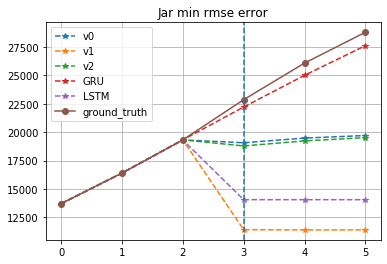

({'v0': array([13711.        , 16399.        , 19320.        , 19071.14938396,
         19482.25730014, 19706.36015558]),
  'v1': array([13711.        , 16399.        , 19320.        , 11424.44917464,
         11401.21590602, 11402.11371452]),
  'v2': array([13711.        , 16399.        , 19320.        , 18789.81414789,
         19233.78611207, 19517.91911852]),
  'GRU': array([13711.        , 16399.        , 19320.        , 22210.6015625 ,
         25002.95117188, 27611.26171875]),
  'LSTM': array([13711.        , 16399.        , 19320.        , 14061.15527344,
         14060.65625   , 14060.85546875])},
 array([13711., 16399., 19320., 22859., 26079., 28793.]))

In [4]:
result.plot_pred_by_dir(jar_min_rmse, best_jar_folder, train=False, increase=False, line_time=3, title='Jar min rmse error')

jar_rnn
489.4813146094229
8489.40008534622
1244.8709091204194
574.92095878316
6983.14431578328


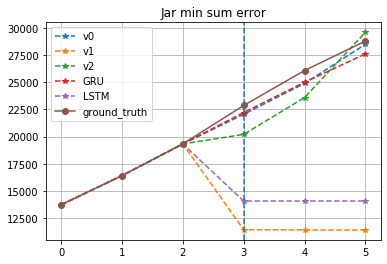

({'v0': array([13711.        , 16399.        , 19320.        , 22044.84011841,
         24894.22055054, 28493.38531494]),
  'v1': array([13711.        , 16399.        , 19320.        , 11424.44917464,
         11401.21590602, 11402.11371452]),
  'v2': array([13711.        , 16399.        , 19320.        , 20197.18039703,
         23588.10517883, 29603.85856628]),
  'GRU': array([13711.        , 16399.        , 19320.        , 22210.6015625 ,
         25002.95117188, 27611.26171875]),
  'LSTM': array([13711.        , 16399.        , 19320.        , 14061.15527344,
         14060.65625   , 14060.85546875])},
 array([13711., 16399., 19320., 22859., 26079., 28793.]))

In [5]:
result.plot_pred_by_dir(jar_min_sum, best_jar_folder, train=False, increase=False, line_time=3, title='Jar min sum error')

In [16]:
# result.output_scr_by_dir(jar_stnn_rmse, best_jar_folder, minepoch='rmse')
result.output_scr_by_dir(jar_rnn_rmse, best_jar_folder, minepoch='rmse', write='a', model='rnn')


In [ ]:
# python train_stnn_v0.py --test False --activation tanh --batch_size 1000 --dataset jar --increase False --lambd 10.0 --lr 0.001 --manualSeed 1892 --mode None --nhid 100 --nlayers 2 --nt_train 12 --data_normalize x --nz 10 --sch_bound 230 --patience 200 --start_time 0 --validation_length 3 --time_datas confirmed --nepoch 5000 --test True

# python train_stnn_v3.py --test False --activation tanh --batch_size 1000 --dataset jar --increase False --lambd 10.0 --lr 0.001 --manualSeed 7751 --mode None --nhid 100 --nlayers 2 --nt_train 12 --data_normalize x --nz 10 --sch_bound 230 --patience 100 --start_time 0 --validation_length 3 --time_datas confirmed --nepoch 1604 --test True & 


## Best Feb

In [2]:
best_feb_folder = os.path.abspath(os.path.join(os.getcwd(), '..', 'output_result', 'best_feb_3'))
feb_result = result.Printer(best_feb_folder)
pd.options.display.max_rows = None
# a = feb_result.get_df(col=['train_loss', 'test_loss', 'mode']).sort_values('test_loss', ascending=True)
feb_df = feb_result.get_df(col=['minsum', 'final_sum_score', 'final_rmse_score', 'activation', 'data_normalize'], increase=False).sort_values('final_rmse_score')
feb_df

,minsum,final_sum_score,final_rmse_score,activation,data_normalize
v3-stnn_05-12-16-58-50_8071,250.281,668.072,72.3393,sigmoid,d
ori-stnn_05-12-16-06-12_0454,767.62,933.935,80.8261,sigmoid,d
v1-stnn_05-12-16-06-13_8446,1814.66,2125.25,144.493,tanh,x
v3-stnn_05-03-23-45-57_6570,NaN,281.599,437.676,sigmoid,NaN
keras-rnn_05-12-15-30-37_0911,NaN,329.841,470.11,tanh,NaN
ori-stnn_05-11-00-03-30_9789,1e+08,108.205,514.625,tanh,d
v3-stnn_05-11-00-08-18_8059,1e+08,38.3702,909.492,tanh,d
v1-stnn_05-11-00-03-30_1801,1e+08,681.387,1050.03,tanh,d
keras-rnn_05-12-15-30-37_4449,NaN,859.419,1486.21,tanh,NaN


In [4]:
feb_min_rmse = {'v0': 'ori-stnn_05-12-16-06-12_0454', 'v1': 'v1-stnn_05-12-16-06-13_8446', 'v2': 'v3-stnn_05-12-16-58-50_8071', 'GRU': 'keras-rnn_05-12-15-30-37_0911', 'LSTM': 'keras-rnn_05-12-15-30-37_4449'}
feb_min_sum = {'v0': 'ori-stnn_05-11-00-03-30_9789', 'v1': 'v1-stnn_05-11-00-03-30_1801', 'v2': 'v3-stnn_05-11-00-08-18_8059', 'GRU': 'keras-rnn_05-12-15-30-37_0911', 'LSTM': 'keras-rnn_05-12-15-30-37_4449'}

feb_stnn_rmse = {'v0': 'ori-stnn_05-12-16-06-12_0454', 'v3': 'v3-stnn_05-12-16-58-50_8071'}
feb_stnn_sum = {'v0': 'ori-stnn_05-11-00-03-30_9789', 'v1': 'v1-stnn_05-11-00-03-30_1801', 'v2': 'v3-stnn_05-11-00-08-18_8059'}

feb_rnn_rmse = {'GRU': 'keras-rnn_05-12-15-30-37_0911', 'LSTM': 'keras-rnn_05-12-15-30-37_4449'}

In [7]:
# result.output_scr_by_dir(feb_stnn_rmse, best_feb_folder, write='a')
result.output_scr_by_dir(feb_rnn_rmse, best_feb_folder, write='a', model='rnn', minepoch='rmse')


feb_rnn
933.9354277852153
2125.249202079975
668.0733393200725
329.8412450047454
859.419348454706


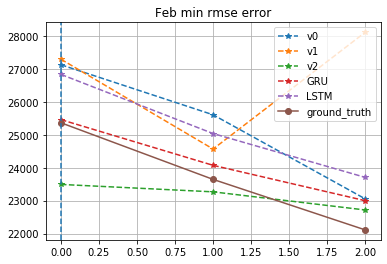

({'v0': array([27127.21984863, 25606.99743652, 23051.23950195]),
  'v1': array([27295.40518007, 24566.19678235, 28114.77927196]),
  'v2': array([23491.17565918, 23265.85333252, 22714.33624268]),
  'GRU': array([25459.61914062, 24071.3828125 , 22996.33203125]),
  'LSTM': array([26834.13671875, 25036.92382812, 23704.58007812])},
 array([25364., 23644., 22109.]))

In [8]:
result.plot_pred_by_dir(feb_min_rmse, best_feb_folder, train=False, increase=False, line_time=0, title='Feb min rmse error')

feb_rnn
108.20452957614434
681.3879360659245
38.369883509366524
329.8412450047454
859.419348454706


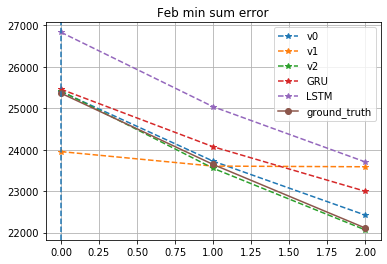

({'v0': array([25403.42236328, 23723.61883545, 22421.21899414]),
  'v1': array([23953.47991943, 23603.97363281, 23587.99853516]),
  'v2': array([25417.23565674, 23552.34051514, 22064.11419678]),
  'GRU': array([25459.61914062, 24071.3828125 , 22996.33203125]),
  'LSTM': array([26834.13671875, 25036.92382812, 23704.58007812])},
 array([25364., 23644., 22109.]))

In [9]:
result.plot_pred_by_dir(feb_min_sum, best_feb_folder, train=False, increase=False, line_time=0, title='Feb min sum error')

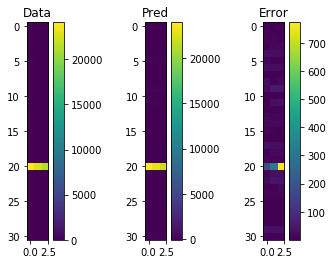

In [7]:
exp_name = 'v3-stnn_05-03-23-45-57_6570'
exp_path = best_feb_folder
exp = result.Exp(exp_name, exp_path)
exp.plot_distribution()

## Mar

In [9]:
best_mar_folder = os.path.abspath(os.path.join(os.getcwd(), '..', 'output_result', 'best_mar_3'))
mar_result = result.Printer(best_mar_folder)
pd.options.display.max_rows = None
# a = mar_result.get_df(col=['train_loss', 'test_loss', 'mode']).sort_values('test_loss', ascending=True)
mar_df = mar_result.get_df(col=['minsum', 'final_sum_score', 'final_rmse_score', 'activation', 'data_normalize', 'nt_train', 'rnn_model'], increase=False).sort_values('final_rmse_score')
mar_df

,minsum,final_sum_score,final_rmse_score,activation,data_normalize,nt_train,rnn_model
ori-stnn_05-12-18-19-44_4341,9.80294,9.80294,3.22383,sigmoid,x,31,NaN
ori-stnn_05-12-18-19-44_8331,9.80294,9.80294,3.22383,sigmoid,x,31,NaN
v3-stnn_05-12-18-19-44_7937,3.79396,33.2624,3.47394,tanh,x,31,NaN
v3-stnn_05-12-18-19-44_5871,3.79396,3.79396,5.91296,tanh,x,31,NaN
keras-rnn_05-13-10-07-37_3329,NaN,162.33,280.692,tanh,NaN,68,GRU_Linear
v1-stnn_05-12-18-19-44_4279,5795.49,5795.49,336.965,sigmoid,x,31,NaN
keras-rnn_05-13-09-46-48_9884,NaN,2369.91,4048.68,tanh,NaN,68,LSTM_module


In [10]:
mar_min_sum = {'v0': 'ori-stnn_05-12-18-19-44_4341', 'v1': 'v1-stnn_05-12-18-19-44_4279', 'v2': 'v3-stnn_05-12-18-19-44_5871', 'GRU': 'keras-rnn_05-13-10-07-37_3329', 'LSTM': 'keras-rnn_05-13-09-46-48_9884'}
mar_stnn_rmse = {'v0': 'ori-stnn_05-12-18-19-44_4341', 'v3': 'v3-stnn_05-12-18-19-44_5871'}
mar_rnn_rmse = {'GRU': 'keras-rnn_05-13-10-07-37_3329', 'LSTM': 'keras-rnn_05-13-09-46-48_9884'}

In [11]:
result.output_scr_by_dir(mar_stnn_rmse, best_mar_folder, write='a')

mar_rnn
9.803224600381274
5795.494782468107
3.794216648837674
162.33057201603606
2369.9147219812503


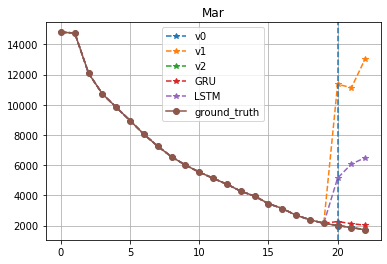

({'v0': array([14809.        , 14762.        , 12088.        , 10722.        ,
          9837.        ,  8958.        ,  8052.        ,  7256.        ,
          6559.        ,  6010.        ,  5546.        ,  5137.        ,
          4740.        ,  4285.        ,  3953.        ,  3459.        ,
          3133.        ,  2690.        ,  2390.        ,  2158.        ,
          2015.13789387,  1885.509905  ,  1736.58384071]),
  'v1': array([14809.        , 14762.        , 12088.        , 10722.        ,
          9837.        ,  8958.        ,  8052.        ,  7256.        ,
          6559.        ,  6010.        ,  5546.        ,  5137.        ,
          4740.        ,  4285.        ,  3953.        ,  3459.        ,
          3133.        ,  2690.        ,  2390.        ,  2158.        ,
         11362.26626487, 11142.13777396, 13062.17154804]),
  'v2': array([14809.        , 14762.        , 12088.        , 10722.        ,
          9837.        ,  8958.        ,  8052.        ,  725

In [14]:
result.plot_pred_by_dir(mar_min_sum, best_mar_folder, train=False, line_time=20, title='Mar')

## Jar

In [19]:
# datadir = 'data'
# dataset = 'jar'
# data, _ = get_time_data(datadir, dataset)
# data = data.numpy()

# plt.figure('ncov Dataset')
# plt.imshow(data[:, :, 0].T, aspect='auto', cmap='jet')
# plt.title('ncov Dataset')
# plt.xlabel('timestep')
# plt.colorbar()
# jar_rmse = {'v0': 'ori-stnn_05-10-17-40-20_9687', 'v1': 'v1-stnn_05-10-15-34-49_8058', 'v3': 'v3-stnn_05-10-17-40-29_1975'}
# jar_min_sum = {'v0': 'ori-stnn_05-10-17-40-20_1897', 'v1': 'v1-stnn_05-10-17-40-23_3861', 'v3': 'v3-stnn_05-10-17-40-28_5828'}
jar_folder = os.path.abspath(os.path.join(os.getcwd(), '..', 'output', 'ori_mar'))
jar_result = result.Printer(jar_folder)
pd.options.display.max_rows = None
# a = jar_result.get_df(col=['train_loss', 'test_loss', 'mode']).sort_values('test_loss', ascending=True)
jar_df = jar_result.get_df(col=['sum_loss', 'minsum', 'minrmse', 'activation', 'nlayers', 'nhid', 'activation', 'lambd', 'nz'], increase=False).sort_values('minrmse')
jar_df

,sum_loss,minsum,minrmse,activation,nlayers,nhid,activation,lambd,nz
ori-stnn_06-17-19-11-04_3854,514.198,9.84681,12.1652,sigmoid,1,0,sigmoid,30,40
ori-stnn_06-17-19-11-04_9925,401.385,42.5395,14.5476,sigmoid,1,0,sigmoid,0.1,40
ori-stnn_06-17-19-11-04_1003,230.334,6.07441,15.9758,sigmoid,1,0,sigmoid,10,40
ori-stnn_06-17-19-11-04_9697,1541.9,10.4636,23.1426,tanh,2,50,tanh,30,40
ori-stnn_06-17-19-11-04_5194,378.511,2.03365,24.8973,tanh,2,100,tanh,30,40
ori-stnn_06-17-19-11-04_2534,3921.03,6.24018,26.2432,tanh,2,50,tanh,30,10
ori-stnn_06-17-19-11-04_2645,1186.18,4.22784,26.4465,tanh,2,100,tanh,10,40
ori-stnn_06-17-19-11-04_5662,642.044,2.07226,27.0806,tanh,1,0,tanh,30,40
ori-stnn_06-17-19-11-04_5304,3546.28,10.3044,28.0115,tanh,2,50,tanh,10,40
ori-stnn_06-17-19-11-04_5459,645.311,12.2757,28.6993,tanh,1,0,tanh,10,40


In [20]:
jar_rmse = {'ori':'ori-stnn_06-17-19-11-04_3854'}
result.output_scr_by_dir(jar_rmse, jar_folder, minepoch='rmse', write='a')

1518
218
2738.5558811822116
14271.205807091073
3355.9202446704585


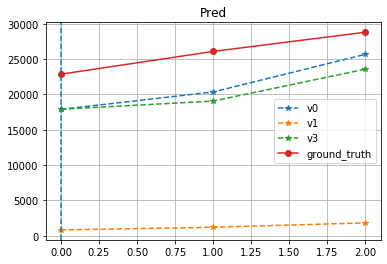

({'v0': array([17880.15332031, 20340.29001617, 25666.42227173]),
  'v1': array([ 817.57034269, 1194.88760614, 1812.22599837]),
  'v3': array([17896.95885468, 19046.58638   , 23569.67610168])},
 array([22859., 26079., 28793.]))

In [5]:
path = 'D:/Jupyter_Documents/ML-code/research_code/output/jar_3'
exp_name = 'ori-stnn_05-10-17-40-20_1897'
# exp_dir = {'test': exp_name}
jar_min_sum = {'v0': 'ori-stnn_05-10-17-40-20_1897', 'v1': 'v1-stnn_05-10-17-40-23_3861', 'v3': 'v3-stnn_05-10-17-40-28_5828'}
exp = result.Exp(exp_name, path)
# print(exp.config['mintest'])
print(exp.config['min_sum_epoch'])
print(exp.config['manualSeed'])
# print(exp.pred_loss())
result.plot_pred_by_dir(jar_min_sum, path, train=False, increase=False)

In [8]:
exp.draw_loss()

FileNotFoundError: [Errno 2] No such file or directory: 'D:/Jupyter_Documents/ML-code/research_code/output/jar_3\\ori-stnn_05-10-17-40-20_1897\\logs.json'

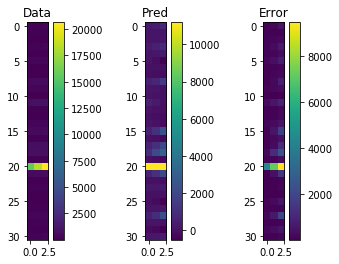

In [9]:
exp.plot_distribution()

## Feb

In [75]:
feb_rmse = {'v0': 'ori-stnn_05-10-17-38-30_9768', 'v1': 'v1-stnn_05-10-17-38-28_9093', 'v3': 'v3-stnn_05-10-17-38-33_0251'}
feb_sum = {'v0': 'ori-stnn_05-10-17-38-30_7738', 'v1': 'v1-stnn_05-10-17-38-28_6094', 'v3': 'v3-stnn_05-10-17-38-33_5930'}

feb_folder = os.path.abspath(os.path.join(os.getcwd(), '..', 'output', 'feb_3'))
feb_result = result.Printer(feb_folder)
pd.options.display.max_rows = 20
# a = feb_result.get_df(col=['train_loss', 'test_loss', 'mode']).sort_values('test_loss', ascending=True)
feb_df = feb_result.get_df(col=['sum_loss', 'minsum', 'minrmse', 'nhid', 'nlayers', 'nz', 'lambd', 'time_datas', 'manualSeed'], increase=False).sort_values('minrmse')
# feb_df = feb_result.get_df(col=['nlayers', 'nhid', 'nz', 'lambd', 'time_datas', 'activation'], increase=False)

feb_df



,sum_loss,minsum,minrmse,nhid,nlayers,nz,lambd,time_datas,manualSeed
ori-stnn_05-10-17-38-30_5447,742.393,160.214,30.5417,100,2,10,0.1,[confirmed],9930
ori-stnn_05-10-17-38-30_5058,3649.19,472.504,70.0058,100,4,10,10,[confirmed],8304
ori-stnn_05-10-17-38-29_3044,9341.17,355.751,71.1426,100,2,10,10,[confirmed],4537
v3-stnn_05-10-17-38-33_0251,11383.6,250.282,72.3394,100,2,10,0.1,[confirmed],299
ori-stnn_05-10-17-38-30_9768,4026.65,767.619,80.8259,100,4,10,0.1,[confirmed],9303
...,...,...,...,...,...,...,...,...,...
ori-stnn_05-10-15-44-41_6135,8031.54,19465.5,2168.79,100,4,10,10,all,6354
v3-stnn_05-10-15-44-51_0820,7571.04,14655.6,2325.09,10,4,10,10,all,2683
ori-stnn_05-10-15-44-41_1827,4184.09,21955.1,2361.47,10,2,10,10,all,9235
ori-stnn_05-10-15-44-41_3910,9236.79,20471.8,2386.8,10,4,10,10,all,5893


In [74]:
result.output_scr_by_dir(feb_rmse, feb_folder, minepoch='rmse', write='a')
# result.output_scr_by_dir(feb_min_sum, feb_folder, minepoch='sum', write='a')

9995
281.5994371670056
281.5994371670056


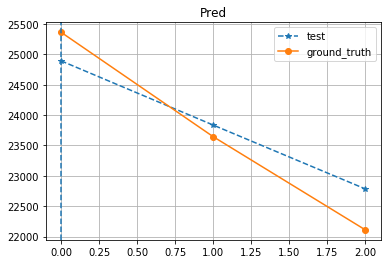

({'test': array([24893.02453613, 23835.34179688, 22783.72558594])},
 array([25364., 23644., 22109.]))

In [19]:
path = 'D:/Jupyter_Documents/ML-code/research_code/output_result/feb'
exp_name = 'v3-stnn_05-03-23-45-57_6570'
exp_dir = {'test': exp_name}
exp = result.Exp(exp_name, path)
# print(exp.config['mintest'])
# print(exp.config['minepoch'])
print(exp.config['manualSeed'])
print(exp.pred_loss())
result.plot_pred_by_dir(exp_dir, path, train=False, increase=False)

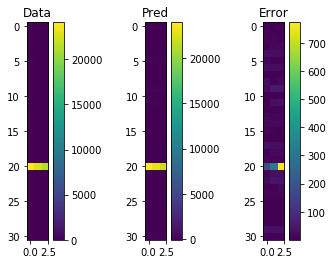

In [21]:
exp.plot_distribution()

## Mar

In [71]:
mar_rmse = {'v0': 'ori-stnn_05-10-17-38-30_9768', 'v1': 'v1-stnn_05-10-17-38-28_9093', 'v3': 'v3-stnn_05-10-17-38-33_0251'}
mar_sum = {'v0': 'ori-stnn_05-10-17-38-30_7738', 'v1': 'v1-stnn_05-10-17-38-28_6094', 'v3': 'v3-stnn_05-10-17-38-33_5930'}

mar_folder = os.path.abspath(os.path.join(os.getcwd(), '..', 'output', 'mar_3'))
mar_result = result.Printer(mar_folder)
pd.options.display.max_rows = 20
# a = mar_result.get_df(col=['train_loss', 'test_loss', 'mode']).sort_values('test_loss', ascending=True)
mar_df = mar_result.get_df(col=['sum_loss', 'minsum', 'minrmse', 'nhid', 'nlayers', 'nz', 'lambd', 'min_rmse_epoch'], increase=False).sort_values('minrmse')
# mar_df = mar_result.get_df(col=['nlayers', 'nhid', 'nz', 'lambd', 'time_datas', 'activation'], increase=False)

mar_df

,sum_loss,minsum,minrmse,nhid,nlayers,nz,lambd,min_rmse_epoch
v3-stnn_05-11-00-11-02_5512,311.452,21.7597,2.51197,0,1,20,30,1587
v3-stnn_05-11-00-11-02_1755,2377.04,9.41803,2.65069,0,1,40,20,2918
v3-stnn_05-11-00-11-02_0252,935.994,6.60832,2.68927,0,1,40,10,149
v3-stnn_05-11-00-11-02_0905,1310.9,26.3375,2.91386,0,1,20,30,2423
v3-stnn_05-11-00-11-02_3516,1351.92,4.50065,3.05517,0,1,20,30,1514
...,...,...,...,...,...,...,...,...
ori-stnn_05-10-17-41-37_6615,36462.4,8852.44,3495.8,10,4,10,10,12
v3-stnn_05-10-15-41-21_1235,36472.4,6590.86,3544.9,10,4,10,0.1,118
v3-stnn_05-10-15-41-21_7010,36396.9,8195.44,3585.54,10,4,10,10,597
ori-stnn_05-10-17-41-37_2632,36362.9,9176.74,3608.9,10,4,10,0.1,1984


## Classical Model

#### Jar

In [29]:
feb_folder = os.path.abspath(os.path.join(os.getcwd(), '..', 'output', 'feb0606'))
feb_result = result.Printer(feb_folder)
pd.options.display.max_rows = None
# a = feb_result.get_df(col=['train_loss', 'test_loss', 'mode']).sort_values('test_loss', ascending=True)
feb_df = feb_result.get_df(col=['activation', 'minsum', 'minrmse', 'nhid', 'nlayers', 'nz', 'lambd', 'data_normalize'], increase=False).sort_values('minrmse')
# feb_df = feb_result.get_df(col=['nlayers', 'nhid', 'nz', 'lambd', 'time_datas', 'activation'], increase=False)

feb_df

,activation,minsum,minrmse,nhid,nlayers,nz,lambd,data_normalize
ori-stnn_06-07-01-01-12_8773,tanh,259.294,208.065,0,1,20,30,d
ori-stnn_06-07-01-01-12_2437,tanh,145.286,231.496,0,1,20,30,d
ori-stnn_06-07-01-01-12_5113,tanh,237.17,239.592,0,1,20,20,d
ori-stnn_06-07-01-01-12_8057,tanh,215.263,247.217,0,1,20,10,d
ori-stnn_06-07-01-01-12_0405,tanh,177.633,272.645,0,1,20,20,d
ori-stnn_06-07-01-01-12_9688,tanh,213.172,299.326,0,1,10,30,d
ori-stnn_06-07-01-01-12_9169,tanh,344.097,301.522,0,1,10,20,d
ori-stnn_06-07-01-01-12_2522,tanh,361.582,302.502,0,1,10,10,d
ori-stnn_06-07-01-01-12_9991,tanh,407.615,302.518,0,1,10,20,d
ori-stnn_06-07-01-01-12_2931,tanh,136.564,325.962,0,1,10,30,d


# RNN

In [7]:
mar_rnn = {'keras1': 'keras-rnn_05-09-16-50-18_9254', 'keras2': 'keras-rnn_05-09-16-50-18_6213'}
feb_rnn = {'keras1': 'keras-rnn_05-10-15-45-12_0911', 'keras2': 'keras-rnn_05-10-15-45-12_4449'}
jar_rnn = {'keras1': 'keras-rnn_05-09-16-47-47_5547', 'keras2': 'keras-rnn_05-09-16-47-47_1851'}

result.output_scr_by_dir(mar_rnn, rnn_mar_folder, configs=['rnn_model', 'activation', 'batch_size', 'dataset', 'increase', 'lr', 'manualSeed', 'nhid', 'nlayers', 'nt_train', 'start_time'], minepoch='rmse')
result.output_scr_by_dir(feb_rnn, rnn_feb_folder, write='a', configs=['rnn_model', 'activation', 'batch_size', 'dataset', 'increase', 'lr', 'manualSeed', 'nhid', 'nlayers', 'nt_train', 'start_time'], minepoch='rmse')
result.output_scr_by_dir(jar_rnn, rnn_jar_folder, write='a', configs=['rnn_model', 'activation', 'batch_size', 'dataset', 'increase', 'lr', 'manualSeed', 'nhid', 'nlayers', 'nt_train', 'start_time'], minepoch='rmse')



In [6]:
rnn_mar_folder = os.path.abspath(os.path.join(os.getcwd(), '..', 'output', 'rnn_mar_3'))
rnn_feb_folder = os.path.abspath(os.path.join(os.getcwd(), '..', 'output', 'rnn_feb_3'))
rnn_jar_folder = os.path.abspath(os.path.join(os.getcwd(), '..', 'output', 'rnn_jar_3'))


In [ ]:
datadir = 'data'
dataset = 'mar'
data, _ = get_time_data(datadir, dataset)
data = data.numpy()

# plt.figure('ncov Dataset')
# plt.imshow(data[:, :, 0].T, aspect='auto', cmap='jet')
# plt.title('ncov Dataset')
# plt.xlabel('timestep')
# plt.colorbar()

mar_folder = os.path.abspath(os.path.join(os.getcwd(), '..', 'output', 'rnn_mar_3'))
mar_result = result.Printer(mar_folder)
pd.options.display.max_rows = None
minsum = {'v0': 'ori-stnn_05-11-00-17-30_7377', 'v3': 'v3-stnn_05-11-00-17-30_0015', 'v1': 'v1-stnn_05-11-00-17-30_7250'}

# a = mar_result.get_df(col=['train_loss', 'test_loss', 'mode']).sort_values('test_loss', ascending=True)
mar_df = mar_result.get_df(col=['sum_loss', 'minsum', 'minrmse', 'data_normalize', 'time_datas', 'activation'], increase=False).sort_values('minsum')
mar_df

In [13]:
datadir = 'data'
dataset = 'feb'
data, _ = get_time_data(datadir, dataset)
data = data.numpy()

# plt.figure('ncov Dataset')
# plt.imshow(data[:, :, 0].T, aspect='auto', cmap='jet')
# plt.title('ncov Dataset')
# plt.xlabel('timestep')
# plt.colorbar()

feb_folder = os.path.abspath(os.path.join(os.getcwd(), '..', 'output', 'feb0606'))
feb_result = result.Printer(feb_folder)
pd.options.display.max_rows = None
feb_sum = {'v0': 'ori-stnn_05-11-00-10-31_1950', 'v3': 'v3-stnn_05-11-00-11-02_6075', 'v1': 'v1-stnn_05-11-00-11-02_4351'}
feb_rmse = {'v0': 'ori-stnn_05-11-00-10-31_1950', 'v3': 'v3-stnn_05-11-00-11-02_6075', 'v1': 'v1-stnn_05-11-00-11-02_4351'}

# a = feb_result.get_df(col=['train_loss', 'test_loss', 'mode']).sort_values('test_loss', ascending=True)
feb_df = feb_result.get_df(col=['nt_train', 'nhid', 'minsum', 'minrmse', 'data_normalize', 'nlayers', 'activation'], increase=False).sort_values('minrmse')
feb_df

,nt_train,nhid,minsum,minrmse,data_normalize,nlayers,activation
ori-stnn_06-07-01-01-12_8773,33,0,259.294,208.065,d,1,tanh
ori-stnn_06-07-01-01-12_2437,33,0,145.286,231.496,d,1,tanh
ori-stnn_06-07-01-01-12_5113,33,0,237.17,239.592,d,1,tanh
ori-stnn_06-07-01-01-12_8057,33,0,215.263,247.217,d,1,tanh
ori-stnn_06-07-01-01-12_0405,33,0,177.633,272.645,d,1,tanh
ori-stnn_06-07-01-01-12_9688,33,0,213.172,299.326,d,1,tanh
ori-stnn_06-07-01-01-12_9169,33,0,344.097,301.522,d,1,tanh
ori-stnn_06-07-01-01-12_2522,33,0,361.582,302.502,d,1,tanh
ori-stnn_06-07-01-01-12_9991,33,0,407.615,302.518,d,1,tanh
ori-stnn_06-07-01-01-12_2931,33,0,136.564,325.962,d,1,tanh


In [15]:
min_sum = {'classical':'ori-stnn_06-07-01-01-12_2437'}
result.output_scr_by_dir(min_sum, feb_folder, minepoch='sum', write='a')

In [116]:
mar_min_sum = {'v0': 'ori-stnn_05-11-00-10-31_1950', 'v3': 'v3-stnn_05-11-00-11-02_6075', 'v1': 'v1-stnn_05-11-00-11-02_4351'}
mar_min_rmse = {'v0': 'ori-stnn_05-11-00-10-31_1950', 'v3': 'v3-stnn_05-11-00-11-02_6075', 'v1': 'v1-stnn_05-11-00-11-02_4351'}

In [117]:
result.output_scr_by_dir(mar_min_sum, mar_folder, minepoch='sum')
result.output_scr_by_dir(mar_min_rmse, mar_folder, minepoch='rmse', write='a')
# result.output_scr_by_dir(mar_min_sum, mar_folder, write='a')

# RNN

## Jar

In [11]:
rnn_jar_folder = os.path.abspath(os.path.join(os.getcwd(), '..', 'output', 'rnn_jar_3'))
rnn_jar_result = result.Printer(rnn_jar_folder)
pd.options.display.max_rows = None

# a = jar_result.get_df(col=['train_loss', 'test_loss', 'mode']).sort_values('test_loss', ascending=True)
rnn_jar_df = rnn_jar_result.get_df(col=['sum_loss', 'true_rmse_loss', 'minrmse', 'activation', 'rnn_model', 'nepoch'], increase=False).sort_values('minrmse')
rnn_jar_df

,sum_loss,true_rmse_loss,minrmse,activation,rnn_model,nepoch
keras-rnn_05-09-16-47-47_5547,6800.61,1757.26,0.0232049,tanh,GRU_Linear,10000
keras-rnn_05-09-16-47-47_6114,6225.18,2888.68,0.0492314,tanh,GRU_Linear,10000
keras-rnn_05-09-16-47-47_2009,3133.45,10659.2,0.249983,tanh,GRU_Linear,10000
keras-rnn_05-09-16-47-47_2797,3245.28,10405.3,0.377749,tanh,GRU_Linear,10000
keras-rnn_05-09-16-47-47_5835,2416.1,12561,20.5018,tanh,GRU_module,10000
keras-rnn_05-09-16-47-47_6028,2416.1,12561,20.5018,tanh,GRU_module,10000
keras-rnn_05-09-16-47-47_1851,2416.1,12561,20.5018,tanh,LSTM_Linear,10000
keras-rnn_05-09-16-47-47_3001,2416.1,12561,20.5018,tanh,GRU_module,10000
keras-rnn_05-09-16-47-47_3300,2416.1,12561,20.5018,tanh,LSTM_Linear,10000
keras-rnn_05-09-16-47-47_3545,2416.1,12561,20.5018,tanh,LSTM_module,10000


In [10]:
rnn_feb_folder = os.path.abspath(os.path.join(os.getcwd(), '..', 'output', 'rnn_feb_3'))
rnn_feb_result = result.Printer(rnn_feb_folder)
pd.options.display.max_rows = None

# a = feb_result.get_df(col=['train_loss', 'test_loss', 'mode']).sort_values('test_loss', ascending=True)
rnn_feb_df = rnn_feb_result.get_df(col=['sum_loss', 'true_rmse_loss', 'minrmse', 'activation', 'rnn_model', 'nepoch'], increase=False).sort_values('minrmse')
rnn_feb_df

,sum_loss,true_rmse_loss,minrmse,activation,rnn_model,nepoch
keras-rnn_05-10-15-45-12_0911,9252.72,19508.1,7.76329e-07,tanh,GRU_module,10000
keras-rnn_05-10-15-45-12_8853,15591.4,3233.04,2.13122e-06,tanh,GRU_module,10000
keras-rnn_05-10-15-45-12_7542,17996.7,885.86,2.72736e-06,tanh,GRU_Linear,10000
keras-rnn_05-10-15-45-12_7662,17174.8,521.638,3.66075e-06,tanh,GRU_Linear,10000
keras-rnn_05-10-15-45-12_4449,17582.7,782.032,7.46714e-06,tanh,LSTM_Linear,10000
keras-rnn_05-10-15-45-12_0421,15500.9,3314.05,1.07377e-05,tanh,LSTM_Linear,10000
keras-rnn_05-10-15-45-12_9048,13753.9,6416.12,1.43419e-05,tanh,GRU_Linear,10000
keras-rnn_05-10-15-45-12_4354,18779,2170.64,1.44537e-05,tanh,LSTM_module,10000
keras-rnn_05-10-15-45-12_2338,17893,717.198,1.90231e-05,tanh,LSTM_module,10000
keras-rnn_05-10-15-45-12_9585,18790,2184.46,2.33409e-05,tanh,GRU_module,10000


In [9]:
rnn_mar_folder = os.path.abspath(os.path.join(os.getcwd(), '..', 'output', 'rnn_mar_3'))
rnn_mar_result = result.Printer(rnn_mar_folder)
pd.options.display.max_rows = None

# a = mar_result.get_df(col=['train_loss', 'test_loss', 'mode']).sort_values('test_loss', ascending=True)
rnn_mar_df = rnn_mar_result.get_df(col=['minrmse', 'activation', 'rnn_model', 'nepoch', 'nt_train', 'nhid', 'nlayers', 'min_rmse_epoch'], increase=False).sort_values('minrmse')
rnn_mar_df

,minrmse,activation,rnn_model,nepoch,nt_train,nhid,nlayers,min_rmse_epoch
keras-rnn_05-12-18-28-01_3329,1.29239e-08,tanh,GRU_Linear,10000,68,100,2,2108
keras-rnn_05-12-18-28-01_9709,4.62614e-07,tanh,GRU_Linear,10000,68,100,1,2387
keras-rnn_05-12-18-28-01_3191,4.66055e-07,tanh,GRU_Linear,10000,68,100,2,815
keras-rnn_05-12-18-28-01_5260,4.6713e-07,tanh,GRU_Linear,10000,68,100,2,9503
keras-rnn_05-12-18-28-01_7004,1.183e-06,tanh,GRU_Linear,10000,68,100,1,126
keras-rnn_05-12-18-28-01_2189,1.34517e-06,tanh,GRU_Linear,10000,68,100,1,283
keras-rnn_05-12-18-28-01_9884,0.0261305,tanh,LSTM_module,10000,68,100,2,5010
keras-rnn_05-12-18-28-01_9514,0.0261305,tanh,GRU_module,10000,68,100,2,8552
keras-rnn_05-12-18-28-01_8765,0.0261306,tanh,LSTM_Linear,10000,68,100,2,8281
keras-rnn_05-12-18-28-01_3821,0.0261306,tanh,GRU_module,10000,68,100,1,9595


In [7]:
# rnn_jar_min = {'LSTM': 'keras-rnn_05-09-16-47-47_1851', 'GRU': 'keras-rnn_05-09-16-47-47_5547'}
# rnn_feb_min = {'LSTM': 'keras-rnn_05-10-15-45-12_4449', 'GRU': 'keras-rnn_05-10-15-45-12_0911'}
rnn_mar_min = {'LSTM': 'keras-rnn_05-12-18-28-01_9884', 'GRU': 'keras-rnn_05-12-18-28-01_3329'}

# result.output_scr_by_dir(rnn_jar_min, rnn_jar_folder, minepoch='rmse', model='rnn')
# result.output_scr_by_dir(rnn_feb_min, rnn_feb_folder, minepoch='rmse', model='rnn', write='a')
result.output_scr_by_dir(rnn_mar_min, rnn_mar_folder, minepoch='rmse', model='rnn', write='w')